In [1]:
import pandas as pd

#Import Data

data = pd.read_csv('sport_data.csv')

In [2]:
# Data Analysis

data 

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball
5,18,5,Male,Basketball
6,15,3,Male,Hockey
7,13,3,Male,Hockey
8,13,4,Male,Hockey
9,13,3,Female,Soccer


In [3]:
data.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [4]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,Female,Basketball
14,19,6,Female,Basketball
15,13,3,Female,Hockey
16,14,4,Female,Hockey
17,14,3,Female,Hockey


In [5]:
data.shape

(18, 4)

In [6]:
data.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


In [7]:
#Pre - Process Data

data['Sex'].replace(['Female','Male'],[0, 1], inplace = True)

In [8]:
data.head()

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball


In [9]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,0,Basketball
14,19,6,0,Basketball
15,13,3,0,Hockey
16,14,4,0,Hockey
17,14,3,0,Hockey


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop(columns ='Sport')
X.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [12]:
y = data.drop(columns =['Age', 'Height', 'Sex'])

In [13]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

In [15]:
clf = DecisionTreeClassifier()

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
test = clf.predict(X_test)

In [18]:
test

array(['Soccer', 'Soccer', 'Soccer', 'Soccer', 'Soccer', 'Basketball'],
      dtype=object)

In [19]:
y_test

,Sport
7,Hockey
17,Hockey
1,Soccer
8,Hockey
15,Hockey
3,Basketball


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
accuracy = accuracy_score(y_test, test)

In [22]:
accuracy

0.3333333333333333

In [23]:
new_student = clf.predict([[15, 4, 1]])

D:\Softwares\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
new_student

array(['Hockey'], dtype=object)

In [25]:
import sklearn.externals 
import joblib

In [26]:
joblib.dump(clf, 'ml_sport_model.joblib')

['ml_sport_model.joblib']

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

In [28]:
from matplotlib import pyplot as plt

In [29]:
c_met = confusion_matrix(y_test, test, labels = clf.classes_)

In [30]:
c_met

array([[1, 0, 0],
       [0, 0, 4],
       [0, 0, 1]], dtype=int64)

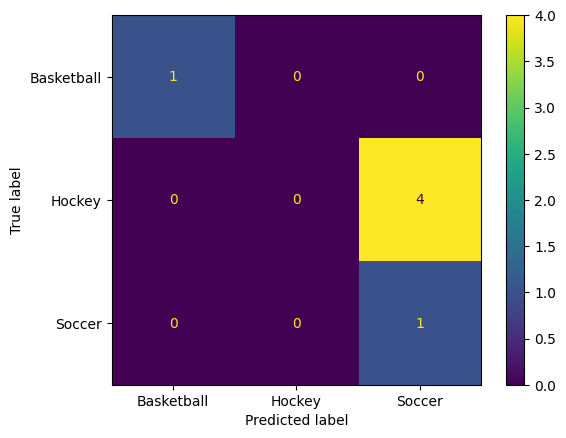

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=c_met,
...                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [32]:
y_test

,Sport
7,Hockey
17,Hockey
1,Soccer
8,Hockey
15,Hockey
3,Basketball


In [33]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

  Basketball       1.00      1.00      1.00         1
      Hockey       0.00      0.00      0.00         4
      Soccer       0.20      1.00      0.33         1

    accuracy                           0.33         6
   macro avg       0.40      0.67      0.44         6
weighted avg       0.20      0.33      0.22         6



D:\Softwares\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Softwares\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#Recall Opposite of precision score deals with false Positive and False Negative
#F1 score is a Harmonic mean between precision score and recall